In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#import json
#import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N =25

In [3]:
G = nx.path_graph(N, create_using=nx.MultiDiGraph)
nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [4]:
G.nodes[0]

{'type': 'vanilla'}

In [5]:
G.edges[(0,1,0)]

{'type': 'vanilla'}

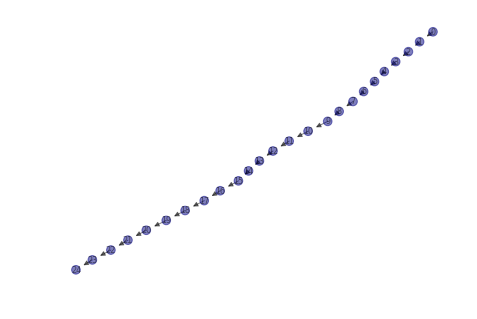

In [6]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [7]:
alpha = 0
iterations = 350

seed = {n:1/len(G.nodes) for n in G.nodes}
#seed = {n:0 for n in G.nodes}
#seed[0] =1

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,.9)}

self_loop_wt= .001

In [8]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=True,
                         lazy_decay = True,
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

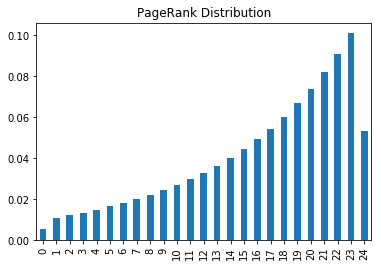

In [9]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

Text(0, 0.5, 'PageRank at Iteration')

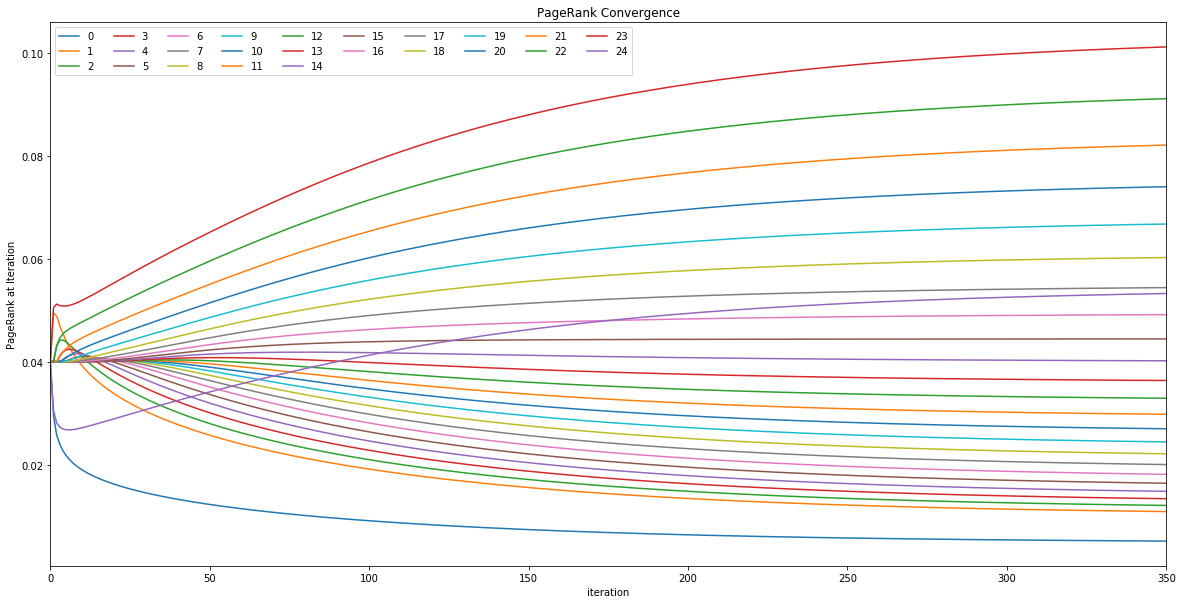

In [17]:
df.plot( figsize=(20,10))
plt.legend(loc='upper left', ncol=10)
plt.title("PageRank Convergence")
plt.xlabel("iteration")
plt.ylabel('PageRank at Iteration')

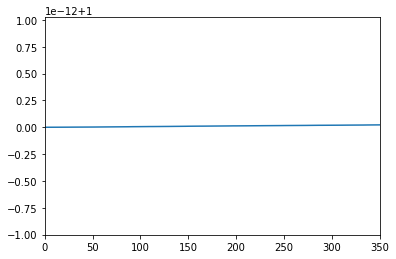

In [11]:
df.sum(axis=1).plot()

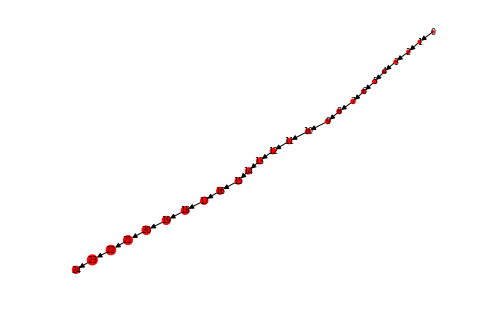

In [12]:
ns = [1000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_kamada_kawai(G, node_size=ns, labels=nl, font_size=8)

In [13]:
nx.get_node_attributes(G,'self_wt')

{0: 0.001,
 1: 0.001,
 2: 0.001,
 3: 0.001,
 4: 0.001,
 5: 0.001,
 6: 0.001,
 7: 0.001,
 8: 0.001,
 9: 0.001,
 10: 0.001,
 11: 0.001,
 12: 0.001,
 13: 0.001,
 14: 0.001,
 15: 0.001,
 16: 0.001,
 17: 0.001,
 18: 0.001,
 19: 0.001,
 20: 0.001,
 21: 0.001,
 22: 0.001,
 23: 0.001,
 24: 0.001}

In [14]:
nx.get_edge_attributes(G,'out_weight')

{(0, 1, 0): 0.9,
 (1, 2, 0): 0.9,
 (2, 3, 0): 0.9,
 (3, 4, 0): 0.9,
 (4, 5, 0): 0.9,
 (5, 6, 0): 0.9,
 (6, 7, 0): 0.9,
 (7, 8, 0): 0.9,
 (8, 9, 0): 0.9,
 (9, 10, 0): 0.9,
 (10, 11, 0): 0.9,
 (11, 12, 0): 0.9,
 (12, 13, 0): 0.9,
 (13, 14, 0): 0.9,
 (14, 15, 0): 0.9,
 (15, 16, 0): 0.9,
 (16, 17, 0): 0.9,
 (17, 18, 0): 0.9,
 (18, 19, 0): 0.9,
 (19, 20, 0): 0.9,
 (20, 21, 0): 0.9,
 (21, 22, 0): 0.9,
 (22, 23, 0): 0.9,
 (23, 24, 0): 0.9}

In [15]:
nx.get_edge_attributes(G,'in_weight')

{(0, 1, 0): 1,
 (1, 2, 0): 1,
 (2, 3, 0): 1,
 (3, 4, 0): 1,
 (4, 5, 0): 1,
 (5, 6, 0): 1,
 (6, 7, 0): 1,
 (7, 8, 0): 1,
 (8, 9, 0): 1,
 (9, 10, 0): 1,
 (10, 11, 0): 1,
 (11, 12, 0): 1,
 (12, 13, 0): 1,
 (13, 14, 0): 1,
 (14, 15, 0): 1,
 (15, 16, 0): 1,
 (16, 17, 0): 1,
 (17, 18, 0): 1,
 (18, 19, 0): 1,
 (19, 20, 0): 1,
 (20, 21, 0): 1,
 (21, 22, 0): 1,
 (22, 23, 0): 1,
 (23, 24, 0): 1}

In [16]:
nx.get_node_attributes(G,'total_wt')

{0: 1.001,
 1: 1.9009999999999998,
 2: 1.9009999999999998,
 3: 1.9009999999999998,
 4: 1.9009999999999998,
 5: 1.9009999999999998,
 6: 1.9009999999999998,
 7: 1.9009999999999998,
 8: 1.9009999999999998,
 9: 1.9009999999999998,
 10: 1.9009999999999998,
 11: 1.9009999999999998,
 12: 1.9009999999999998,
 13: 1.9009999999999998,
 14: 1.9009999999999998,
 15: 1.9009999999999998,
 16: 1.9009999999999998,
 17: 1.9009999999999998,
 18: 1.9009999999999998,
 19: 1.9009999999999998,
 20: 1.9009999999999998,
 21: 1.9009999999999998,
 22: 1.9009999999999998,
 23: 1.9009999999999998,
 24: 0.901}